In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt

In [25]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)


In [26]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Download and Unzip State by State dataset

In [ ]:
import requests
from bs4 import BeautifulSoup
import os
import zipfile
# Download the additional ZIP file
additional_zip_url = 'https://www.epa.gov/system/files/other-files/2024-09/allstateghgdata90-22_v082924.zip'
additional_zip_path = 'epa_data/allstateghgdata.zip'

os.makedirs('epa_data', exist_ok=True)

print(f"Downloading {additional_zip_url}...")
response = requests.get(additional_zip_url)
with open(additional_zip_path, 'wb') as file:
    file.write(response.content)

print("File downloaded.")

# Unzip the file
with zipfile.ZipFile(additional_zip_path, 'r') as zip_ref:
    zip_ref.extractall('epa_data')

print("File unzipped.")
os.rename('epa_data/allstateghgdata90-22_v082924.xlsx', 'epa_data/allstateghgdata.xlsx')


In [21]:
# Assuming the Excel file is named 'allstateghgdata.xlsx' and is located in the 'epa_data' directory
excel_file_path = 'epa_data/allstateghgdata.xlsx'

# Read the Excel file with multiple sheets
un_sector = pd.read_excel(excel_file_path, sheet_name=1)
econ_sector = pd.read_excel(excel_file_path, sheet_name=2)





In [21]:
un_sector.head(5000)

,sector,subsector,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,sub_category_5,carbon_pool,fuel1,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002264,0.002704,0.003249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Energy,Fossil Fuel Combustion,Electricity Generation,NaN,NaN,NaN,NaN,NaN,NaN,Natural Gas,...,4.739748,4.658789,5.468827,4.645333,4.600432,4.399710,6.081696,5.428694,6.431485,5.536678
4996,Energy,Fossil Fuel Combustion,Electricity Generation,NaN,NaN,NaN,NaN,NaN,NaN,Natural Gas,...,0.008881,0.008903,0.010394,0.008758,0.008794,0.008403,0.011697,0.010442,0.012451,0.008723
4997,Energy,Fossil Fuel Combustion,Electricity Generation,NaN,NaN,NaN,NaN,NaN,NaN,Natural Gas,...,0.029171,0.029263,0.034161,0.028782,0.028906,0.027615,0.038437,0.034317,0.040937,0.028600
4998,Energy,Fossil Fuel Combustion,Electricity Generation,NaN,NaN,NaN,NaN,NaN,NaN,Natural Gas,...,3.297340,3.254837,5.441986,6.434515,5.767830,6.963073,7.987417,8.706935,8.186948,9.520298


In [20]:
un_sector.to_csv('testCSV.csv', index=False)

In [16]:
econ_sector.head()

,econ_sector,econ_subsector,sector,subsector,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,sub_category_5,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,0.021973,0.020588,0.003934,0.004712,0.003303,0.004553,0.003750,0.004008,0.004094,0.004039
1,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,0.405321,0.340277,0.299993,0.389063,0.319967,0.376200,0.386687,0.345480,0.352673,0.347956
2,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,1.488775,1.333660,1.203423,1.228332,0.916704,1.130034,1.070653,1.032991,1.052542,1.038465
3,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,0.582441,0.598184,0.449419,0.566802,0.490579,0.400804,0.437455,0.392028,0.398905,0.393570
4,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,4.009574,4.711127,4.518359,3.914111,3.825177,3.540273,3.216634,3.076691,3.134478,3.092556


In [17]:
un_sector.columns
econ_sector.columns

Index(['sector', 'subsector', 'category', 'sub_category_1', 'sub_category_2',
       'sub_category_3', 'sub_category_4', 'sub_category_5', 'carbon_pool',
       'fuel1', 'fuel2', 'geo_ref', 'units', 'ghg_category', 'ghg', 'gwp',
       'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997',
       'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005',
       'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013',
       'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021',
       'Y2022'],
      dtype='object')

Index(['econ_sector', 'econ_subsector', 'sector', 'subsector', 'category',
       'sub_category_1', 'sub_category_2', 'sub_category_3', 'sub_category_4',
       'sub_category_5', 'carbon_pool', 'fuel1', 'fuel2', 'geo_ref', 'units',
       'ghg', 'ghg_category', 'gwp', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017',
       'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022'],
      dtype='object')

In [19]:
print(un_sector['geo_ref'])

0        AK
1        AL
2        AR
3        AS
4        AZ
         ..
28443    WI
28444    WV
28445    WV
28446    WY
28447    WY
Name: geo_ref, Length: 28448, dtype: object


In [ ]:
from pprint import pprint

un_sector['sector'].unique()
un_sector['subsector'].unique()
pprint(un_sector.groupby('sector')['subsector'].unique())

In [ ]:
length = len(un_sector)
for i in range(1, 6):
    na_sum = un_sector[f'sub_category_{i}'].isna().sum()
    if na_sum == length:
        un_sector = un_sector.drop(columns=[f'sub_category_{i}'])

In [ ]:
un_sector.columns

In [ ]:
un_sector['fuel1'].isna().sum()
un_sector['fuel2'].isna().sum()

In [ ]:
un_sector.head()

In [ ]:
un_sector['ghg_category'].unique()

In [ ]:
# un_sector.groupby(['sector', 'geo_ref'])['ghg_category'].nunique()
time = ['Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022']
sector_sum = un_sector.groupby(['sector'])[time].sum()
state_sum = un_sector.groupby(['sector', 'geo_ref', 'ghg_category'])[time].sum()
sector_sum
state_sum

In [ ]:
sector_sum_diff = sector_sum.pct_change(axis='columns') * 100
sector_sum_diff


In [ ]:
# Plotting sector_sum_diff data with 6 lines for each sector
fig, ax = plt.subplots(figsize=(14, 8))

# Define colors for each sector
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot each sector
for (sector), color in zip(sector_sum_diff.index, colors):
    ax.plot(time, sector_sum_diff.loc[sector], label=f'{sector}', color=color)

ax.set_xlabel('Year')
ax.set_ylabel('Percentage Change')
ax.set_title('Percentage Change by Sector from 1990 to 2022')
ax.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:

# Plotting sector_sum data with 6 lines for each sector
fig, ax = plt.subplots(figsize=(14, 8))

# Define colors for each sector
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot each sector
for (sector), color in zip(sector_sum.index, colors):
    ax.plot(time, sector_sum.loc[sector], label=f'{sector}', color=color)

ax.set_xlabel('Year')
ax.set_ylabel('Concentrations')
ax.set_title('Concentrations by Sector and GHG Category from 1990 to 2022')
ax.legend(title='Sector and GHG Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [7]:
#nunique of geo_ref
un_sector['geo_ref'].unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UM', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI',
       'WV', 'WY', 'National', 'FO', 'FM', 'MH', 'PW', 'USTERR'],
      dtype=object)

In [28]:
stateWeatherDF = pd.read_csv('StateWeatherData.csv')
stateWeatherDF.head()
avg = (stateWeatherDF.drop(columns=['Year']).mean().sum())/49

,Year,AL,AK,AZ,AR,CA,CO,CT,DE,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,1990,64.9,25.4,59.7,61.8,58.0,45.6,51.1,57.2,72.5,...,46.9,59.4,65.6,48.7,44.1,57.4,47.3,53.9,44.5,41.9
1,1991,64.0,27.0,59.3,61.3,58.1,45.1,51.0,56.9,71.8,...,46.8,59.1,64.8,47.5,43.5,57.0,47.1,53.9,43.7,41.7
2,1992,62.1,25.0,59.6,59.9,59.3,45.3,47.7,53.9,70.3,...,45.6,57.0,64.4,49.0,40.6,54.4,48.6,51.3,42.7,42.5
3,1993,62.3,29.9,59.8,59.3,57.7,43.8,48.7,54.9,70.3,...,42.3,57.2,64.1,46.8,41.2,55.1,45.6,51.9,41.7,38.9
4,1994,63.1,26.2,60.6,60.4,58.0,46.5,48.9,55.0,71.6,...,44.9,57.6,65.6,49.7,41.3,55.3,47.9,51.8,43.0,42.9


In [ ]:
abbrevList = un_sector['geo_ref']
abbrevList


0        AK
1        AL
2        AR
3        AS
4        AZ
         ..
28443    WI
28444    WV
28445    WV
28446    WY
28447    WY
Name: geo_ref, Length: 28448, dtype: object

In [30]:
# Initialize YearTemp columns in un_sector DataFrame
years = range(1990, 2023)
for year in years:
    un_sector[f'{year}Temp'] = None

# Populate YearTemp columns in un_sector
for idx, row in un_sector.iterrows():
    state = row['geo_ref']  # Get the state abbreviation
    for year in years:
        year_column = f'{year}Temp'
        if state in stateWeatherDF.columns:  # Check if state exists in stateWeatherDF
            # Match the year and extract the value
            temp_value = stateWeatherDF.loc[stateWeatherDF['Year'] == year, state].values
            if temp_value.size > 0:  # If value exists
                un_sector.at[idx, year_column] = temp_value[0]
            else:
                un_sector.at[idx, year_column] = avg  # Use custom average
        else:
            un_sector.at[idx, year_column] = avg  # Use custom average for missing state

print(un_sector)

            sector                                          subsector  \
0      Agriculture  CO2 Emissions from Liming, Urea Application an...   
1      Agriculture  CO2 Emissions from Liming, Urea Application an...   
2      Agriculture  CO2 Emissions from Liming, Urea Application an...   
3      Agriculture  CO2 Emissions from Liming, Urea Application an...   
4      Agriculture  CO2 Emissions from Liming, Urea Application an...   
...            ...                                                ...   
28443        Waste                 Wastewater Treatment and Discharge   
28444        Waste                 Wastewater Treatment and Discharge   
28445        Waste                 Wastewater Treatment and Discharge   
28446        Waste                 Wastewater Treatment and Discharge   
28447        Waste                 Wastewater Treatment and Discharge   

         category sub_category_1 sub_category_2 sub_category_3  \
0          Liming       Dolomite            NaN          

In [31]:
un_sector.to_csv('unSectorWithTemp.csv', index=False)

LinearRegression()

Text(0.5, 0, 'Y1990, Y1991, ... (Combined)')

Text(0, 0.5, 'Temp (Combined)')

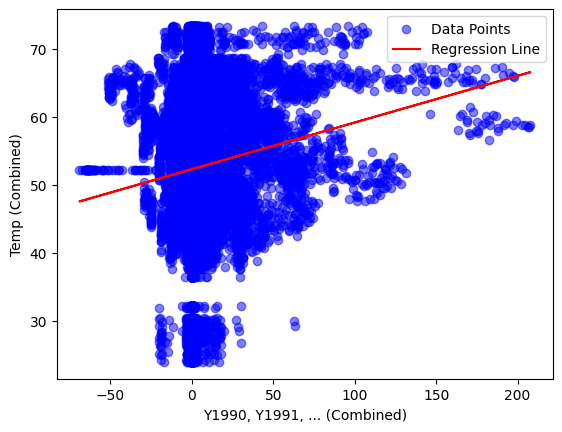

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Reshape data for a single linear regression
years = range(1990, 2023)
X = un_sector[]
Y = []

# Loop through years and combine columns
for year in years:
    X.extend(un_sector[f"Y{year}"].values)  # Independent variable
    Y.extend(un_sector[f"{year}Temp"].values)  # Dependent variable

# Convert to numpy arrays
X = np.array(X).reshape(-1, 1)
Y = np.array(Y)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, Y)

# Predict the Y values
Y_pred = model.predict(X)

# Plot the data points
plt.scatter(X, Y, color='blue', alpha=0.5, label='Data Points')

# Plot the regression line
plt.plot(X, Y_pred, color='red', label='Regression Line')

plt.xlabel('Y1990, Y1991, ... (Combined)')
plt.ylabel('Temp (Combined)')
plt.legend()
plt.show()


In [35]:
# Get the slope (m) and intercept (b)
m = model.coef_[0]  # Since it's a simple regression, there's only one coefficient
b = model.intercept_

# Print the equation
print(f"The equation of the regression line is: y = {m:.2f}x + {b:.2f}")


The equation of the regression line is: y = 0.07x + 52.33


In [38]:
# Calculate the R^2 value
r_squared = model.score(X, Y)

# Print the R^2 value
print(f"The R^2 value is: {r_squared:.4f}")


The R^2 value is: 0.0008



Regression Results Summary:
--------------------------

Sector: Agriculture
R-squared: 0.0003
P-value: 3.6448e-11
Slope: 1.5389e-01

Sector: Energy
R-squared: 0.0042
P-value: 5.4452e-165
Slope: 7.5276e-02

Sector: Energy-Excluded
R-squared: 0.0279
P-value: 6.4494e-168
Slope: 9.6374e-01

Sector: Industrial Processes and Product Use
R-squared: 0.0033
P-value: 9.9211e-268
Slope: 1.4272e+00

Sector: Land Use, Land-Use Change and Forestry
R-squared: 0.0011
P-value: 3.6040e-55
Slope: -1.4134e-01

Sector: Waste
R-squared: 0.0164
P-value: 4.5997e-61
Slope: 7.3951e-01


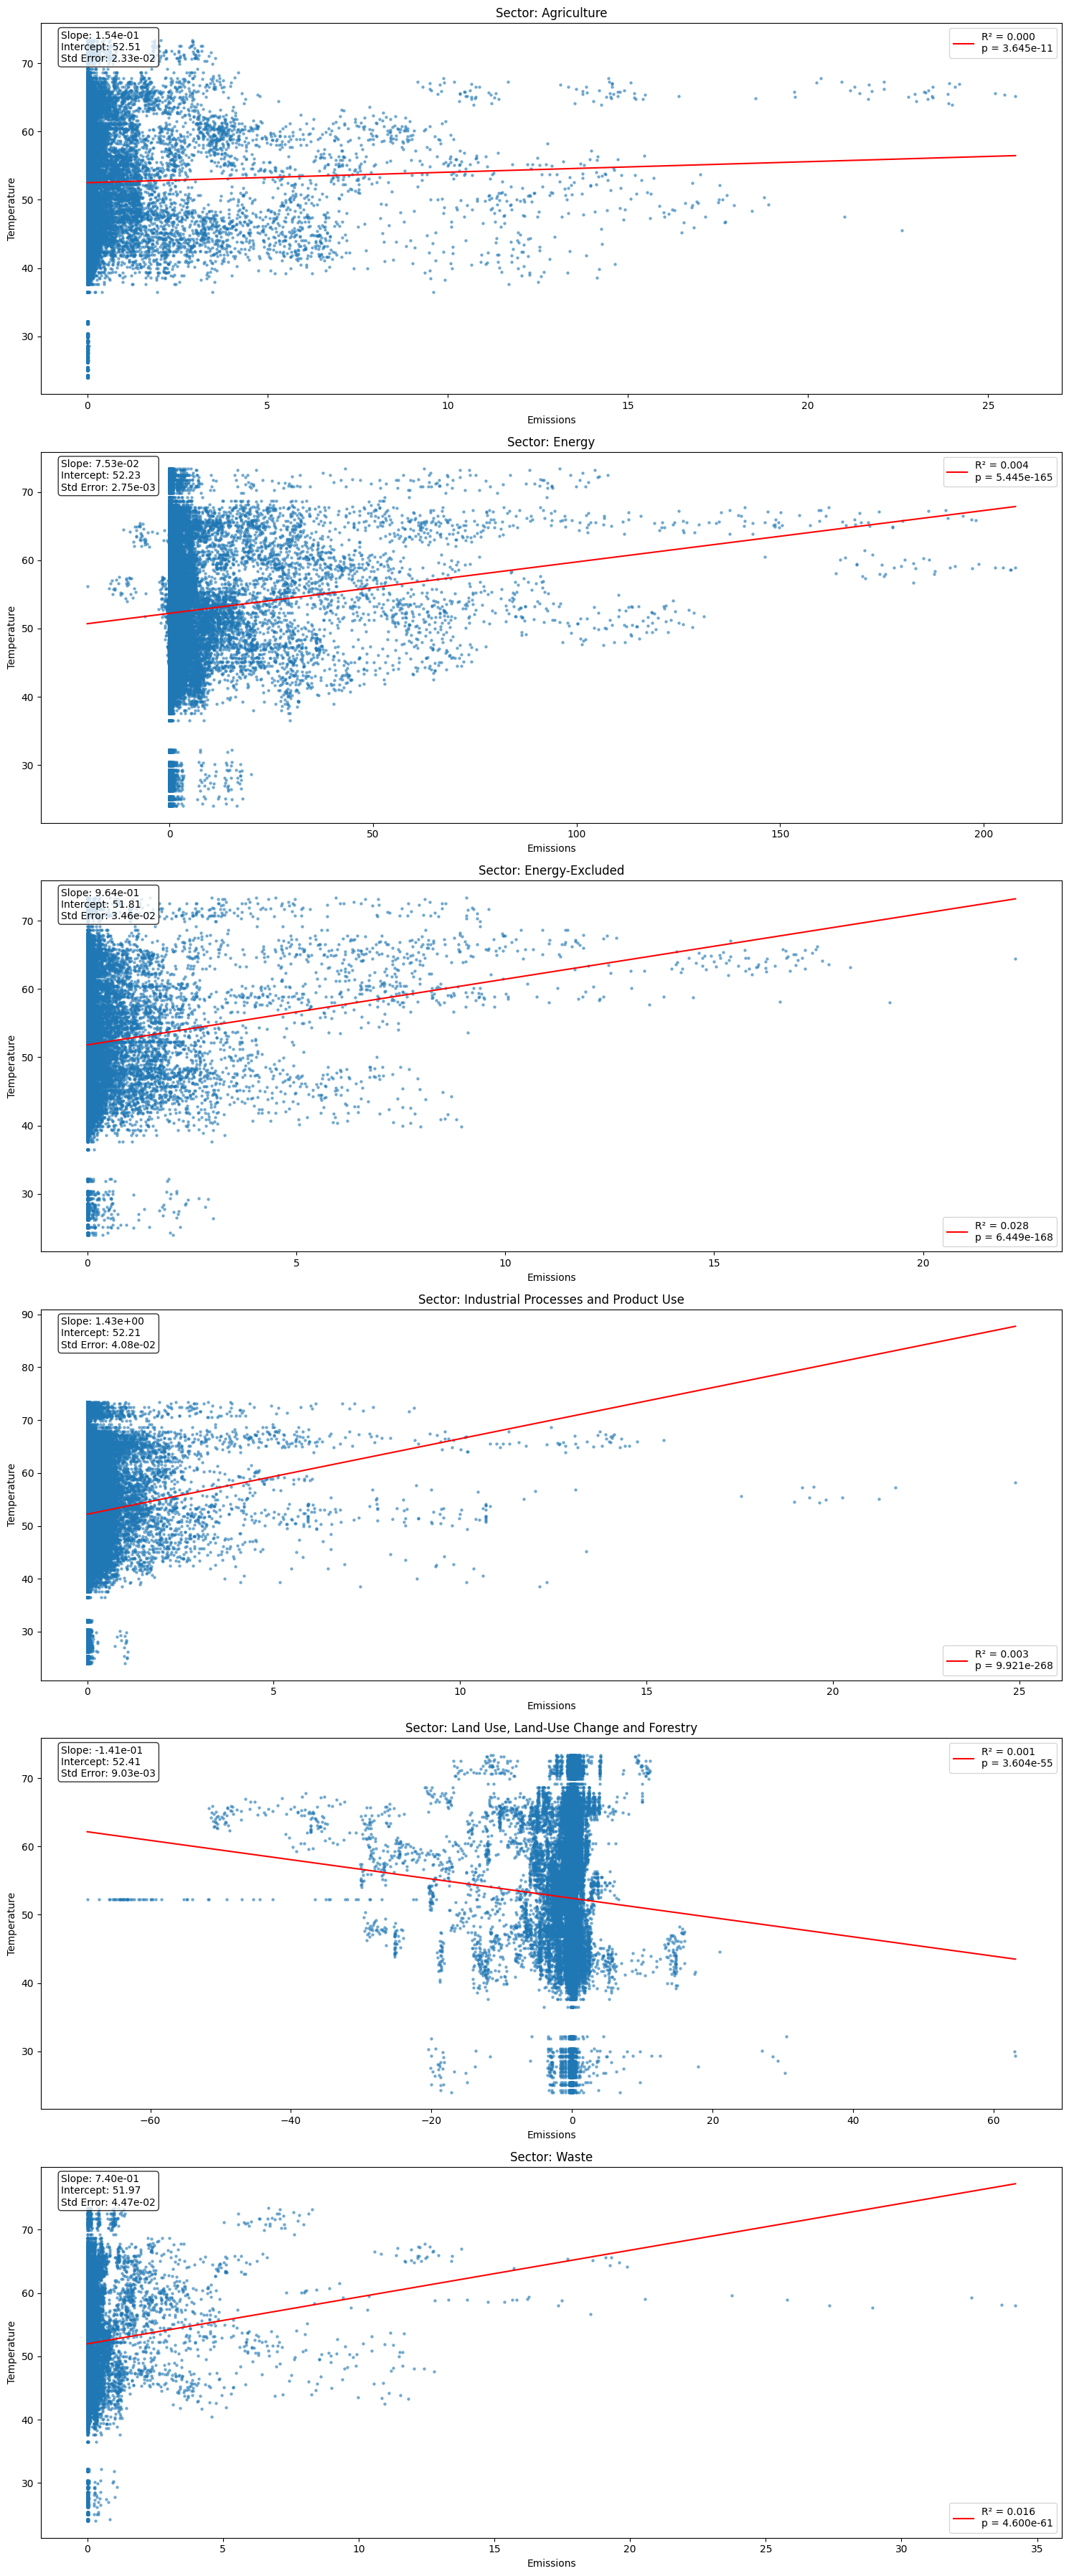

In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

def run_sector_group_analysis(un_sector):
    # Group by sector
    grouped = un_sector.groupby('sector')
    
    # Store results
    results = {}
    
    # Create subplot grid
    n_sectors = len(grouped)
    fig, axs = plt.subplots(n_sectors, 1, figsize=(15, 6*n_sectors))
    
    # For each sector group
    for idx, (sector_name, sector_data) in enumerate(grouped):
        # Get temperature and emission data for all years
        temps = []
        emissions = []
        
        # Collect data across all years
        for year in range(1990, 2023):
            temp_col = f'{year}Temp'
            emission_col = f'Y{year}'
            
            # Convert to numeric and handle any non-numeric values
            year_temps = pd.to_numeric(sector_data[temp_col], errors='coerce')
            year_emissions = pd.to_numeric(sector_data[emission_col], errors='coerce')
            
            # Only keep pairs where both values are valid
            valid_mask = ~pd.isna(year_temps) & ~pd.isna(year_emissions)
            valid_temps = year_temps[valid_mask]
            valid_emissions = year_emissions[valid_mask]
            
            temps.extend(valid_temps)
            emissions.extend(valid_emissions)
        
        # Convert to numpy arrays
        temps = np.array(temps)
        emissions = np.array(emissions)
        
        # Skip if no valid data
        if len(temps) == 0 or len(emissions) == 0:
            print(f"Skipping {sector_name} - no valid data")
            continue
            
        # Run regression
        slope, intercept, r_value, p_value, std_err = st.linregress(emissions, temps)
        
        # Store results
        results[sector_name] = {
            'slope': slope,
            'intercept': intercept,
            'r_squared': r_value**2,
            'p_value': p_value,
            'std_err': std_err
        }
        
        # Plot
        if isinstance(axs, np.ndarray):
            ax = axs[idx]
        else:
            ax = axs  # In case there's only one sector
            
        ax.scatter(emissions, temps, alpha=0.5, s=5)
        
        # Add regression line
        x_range = np.linspace(min(emissions), max(emissions), 100)
        ax.plot(x_range, slope * x_range + intercept, 'r', 
               label=f'R² = {r_value**2:.3f}\np = {p_value:.3e}')
        
        ax.set_title(f'Sector: {sector_name}')
        ax.set_xlabel('Emissions')
        ax.set_ylabel('Temperature')
        ax.legend()
        
        # Add text with statistics
        stats_text = (f'Slope: {slope:.2e}\n'
                     f'Intercept: {intercept:.2f}\n'
                     f'Std Error: {std_err:.2e}')
        ax.text(0.02, 0.98, stats_text, 
               transform=ax.transAxes,
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    
    # Print summary of results
    print("\nRegression Results Summary:")
    print("--------------------------")
    for sector, stats in results.items():
        print(f"\nSector: {sector}")
        print(f"R-squared: {stats['r_squared']:.4f}")
        print(f"P-value: {stats['p_value']:.4e}")
        print(f"Slope: {stats['slope']:.4e}")
    
    return fig, results

# Run the analysis
fig, regression_results = run_sector_group_analysis(un_sector)
plt.show()